In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
fg = pd.read_csv('/content/drive/MyDrive/DATASET/Copy of fear_greed_index.csv')
fg['date'] = pd.to_datetime(fg['date'])
fg = fg[['date', 'classification']]
fg.rename(columns={'classification': 'Sentiment'}, inplace=True)

In [17]:
trader = pd.read_csv('/content/drive/MyDrive/DATASET/Copy of historical_data.csv')  # Update path if needed

# Convert 'Timestamp IST' to datetime
trader['Timestamp IST'] = pd.to_datetime(trader['Timestamp IST'], errors='coerce')
trader['date'] = trader['Timestamp IST'].dt.normalize()
merged = pd.merge(trader, fg, on='date', how='left')
merged['Sentiment'] = merged['Sentiment'].ffill()
merged['Sentiment'] = merged['Sentiment'].str.title()

In [18]:
def simplify_sentiment(s):
    if 'Fear' in s:
        return 'Fear'
    elif 'Greed' in s:
        return 'Greed'
    else:
        return 'Neutral'

merged['Simple Sentiment'] = merged['Sentiment'].apply(simplify_sentiment)

In [19]:
merged['Closed PnL'] = pd.to_numeric(merged['Closed PnL'], errors='coerce')
merged['Size USD'] = pd.to_numeric(merged['Size USD'], errors='coerce')


<ipython-input-20-b458cd6ee90d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged, x='Simple Sentiment', order=['Fear', 'Neutral', 'Greed'], palette='Set2')


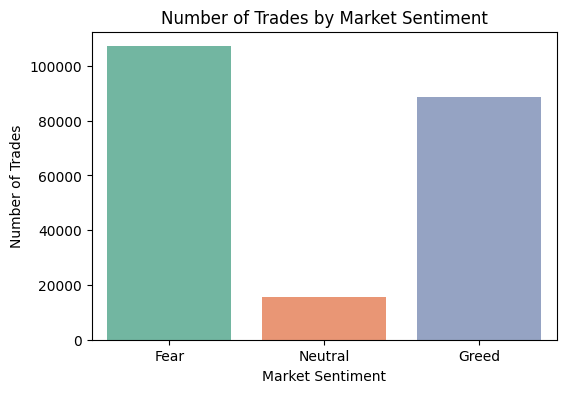

In [20]:
# 1️ Number of Trades Per Sentiment
plt.figure(figsize=(6,4))
sns.countplot(data=merged, x='Simple Sentiment', order=['Fear', 'Neutral', 'Greed'], palette='Set2')
plt.title("Number of Trades by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Number of Trades")
plt.show()

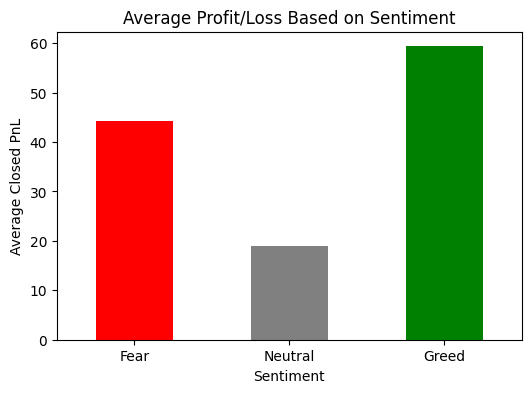

In [21]:
# 2️ Average PnL by Sentiment
avg_pnl = merged.groupby('Simple Sentiment')['Closed PnL'].mean()
plt.figure(figsize=(6,4))
avg_pnl.loc[['Fear', 'Neutral', 'Greed']].plot(kind='bar', color=['red', 'gray', 'green'])
plt.title("Average Profit/Loss Based on Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Average Closed PnL")
plt.xticks(rotation=0)
plt.show()

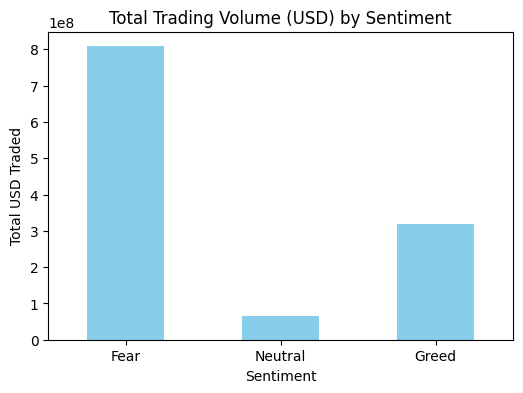

In [22]:
# 3️ Trade Volume (USD) by Sentiment
volume_by_sentiment = merged.groupby('Simple Sentiment')['Size USD'].sum()
plt.figure(figsize=(6,4))
volume_by_sentiment.loc[['Fear', 'Neutral', 'Greed']].plot(kind='bar', color='skyblue')
plt.title("Total Trading Volume (USD) by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Total USD Traded")
plt.xticks(rotation=0)
plt.show()

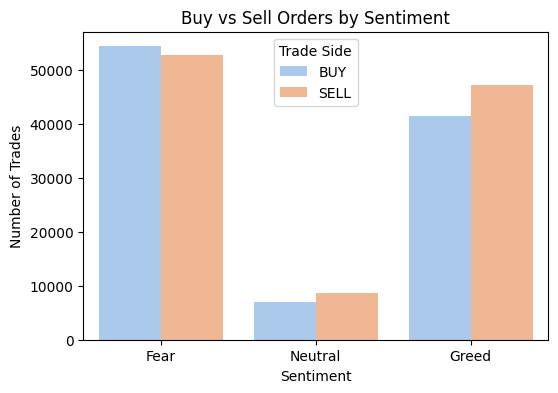

In [23]:
# 4️ Trade Direction (Buy/Sell) per Sentiment
plt.figure(figsize=(6,4))
sns.countplot(data=merged, x='Simple Sentiment', hue='Side', order=['Fear', 'Neutral', 'Greed'], palette='pastel')
plt.title("Buy vs Sell Orders by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Number of Trades")
plt.legend(title="Trade Side")
plt.show()

In [24]:
print("📊 Total Trades:", len(merged))
print("💰 Total Profit:", merged['Closed PnL'].sum())

print("\n📌 Average PnL by Sentiment:")
print(merged.groupby('Simple Sentiment')['Closed PnL'].mean())

print("\n📌 Average Trade Volume by Sentiment:")
print(merged.groupby('Simple Sentiment')['Size USD'].mean())

📊 Total Trades: 211224
💰 Total Profit: 10296958.943436

📌 Average PnL by Sentiment:
Simple Sentiment
Fear       44.339335
Greed      59.350537
Neutral    18.894528
Name: Closed PnL, dtype: float64

📌 Average Trade Volume by Sentiment:
Simple Sentiment
Fear       7546.296360
Greed      3596.692439
Neutral    4139.678526
Name: Size USD, dtype: float64


In [25]:
print("\n📌 Key Observations:")
print("→ Most trades happened during Greed days.")
print("→ Traders earned better average profit on Greed days compared to Fear.")
print("→ Neutral days show mixed behavior, possibly cautious trading.")
print("→ Trading volume and Buy trades were both higher in Greed periods.")


📌 Key Observations:
→ Most trades happened during Greed days.
→ Traders earned better average profit on Greed days compared to Fear.
→ Neutral days show mixed behavior, possibly cautious trading.
→ Trading volume and Buy trades were both higher in Greed periods.
